In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
centers = pd.read_csv('data.csv', index_col=0)
centers = centers[centers['POSITION'] == 'Center'].reset_index(drop=True)

positions = centers['POSITION']
features = centers.drop(["PLAYER_ID", "NAME", "POSITION"], axis = 1)

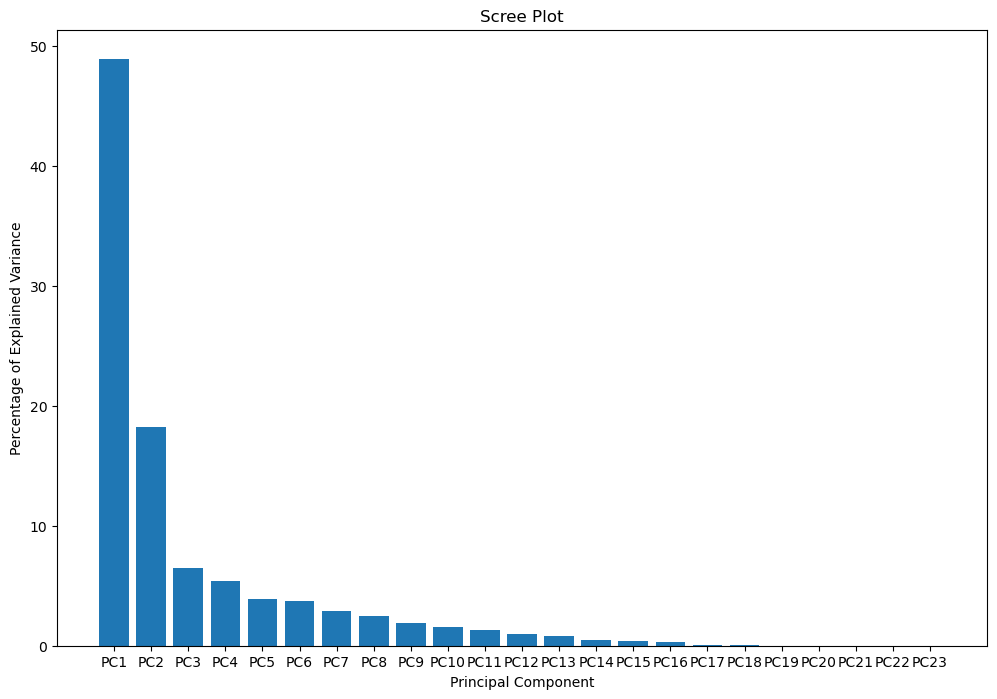

In [28]:
scaled_data = preprocessing.scale(features)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize = (12, 8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

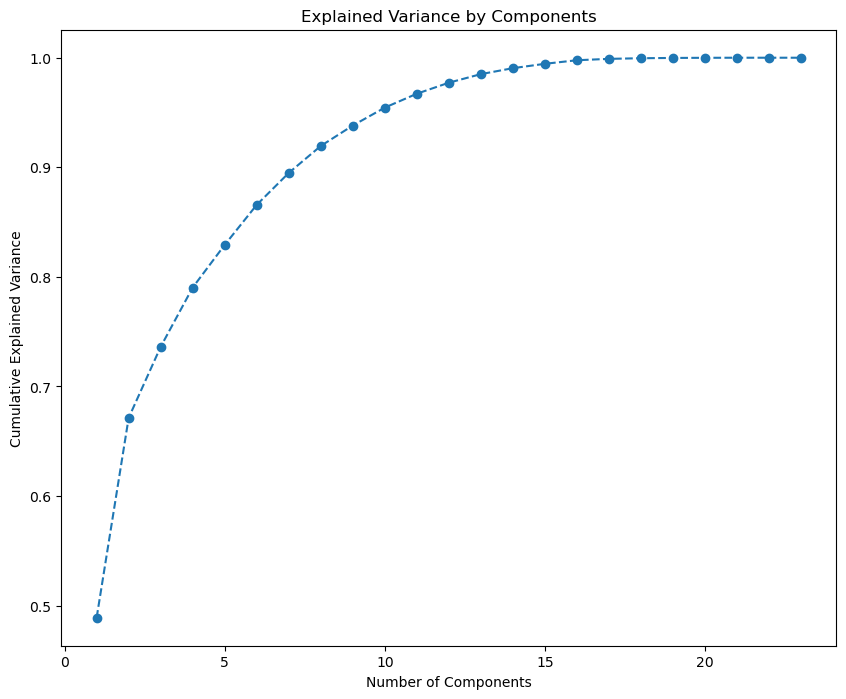

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1,24), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

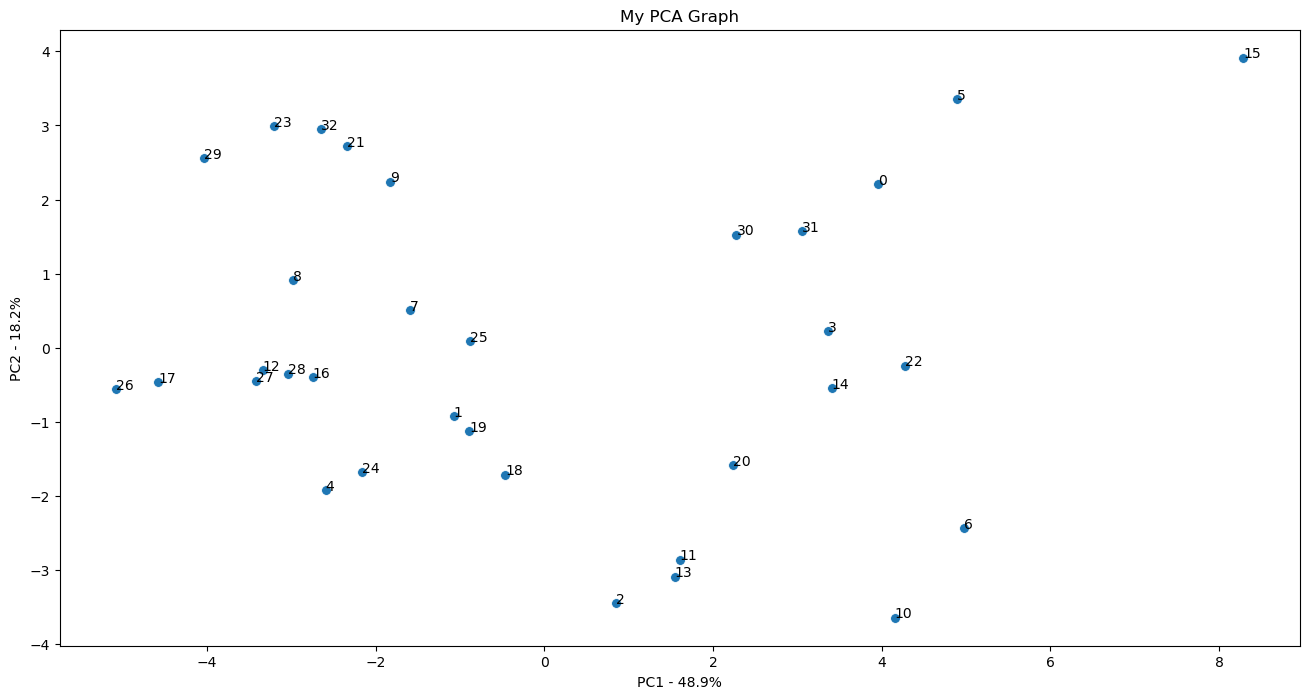

In [30]:
pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(pca_data.shape[1])])

plt.figure(figsize = (16, 8))
sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', s = 50)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

C:\Users\gelias006\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


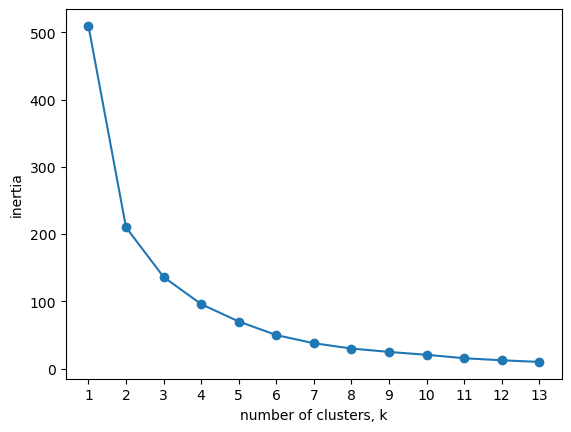

In [34]:
#Perform PCA with the chosen number of components

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

#K-means

ks = range(1,14)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, init='k-means++', random_state = 42)
    model.fit(pca_data)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [35]:
kmeans_pca = KMeans(n_clusters = 3, init='k-means++', random_state = 42)
kmeans_pca.fit(pca_data)

center_clusters = pd.concat([centers, pd.DataFrame(pca_data)], axis = 1)
center_clusters.columns.values[-2: ] = ['Component_1', 'Component_2']
center_clusters['Segment K-means PCA'] = kmeans_pca.labels_
center_clusters['Segment'] = center_clusters['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third'})

center_clusters

,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,...,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G,Component_1,Component_2,Segment K-means PCA,Segment
0,201572,Brook Lopez,Center,215.90,127.913048,58.066667,55.400000,6.170211,12.624695,0.485533,...,16.190668,1.327219,5.824240,1.937664,3.886576,29.490476,3.954576,2.203112,1,second
1,201577,Robin Lopez,Center,213.36,127.459456,62.733333,40.200000,3.614456,6.536157,0.554267,...,8.528102,0.818666,4.706355,2.198509,2.507847,20.846814,-1.075825,-0.926352,0,first
2,201599,DeAndre Jordan,Center,210.82,120.201978,57.947368,45.526316,3.358739,5.019633,0.672632,...,8.278132,1.039085,9.434215,2.742129,6.692086,23.914806,0.844497,-3.447895,2,third
3,202685,Jonas Valanciunas,Center,210.82,120.201978,57.538462,53.615385,5.531306,9.964857,0.555923,...,14.142366,1.379234,9.519485,2.851938,6.667547,25.535819,3.364851,0.225487,1,second
4,202687,Bismack Biyombo,Center,203.20,115.666054,61.666667,25.833333,1.841686,3.486063,0.496083,...,4.790784,0.601063,5.517156,1.797538,3.719618,18.172667,-2.592505,-1.921487,0,first
5,202696,Nikola Vucevic,Center,208.28,117.934016,58.285714,53.928571,7.369910,15.191281,0.483857,...,17.595314,2.883322,10.550935,2.547413,8.003522,30.928465,4.893633,3.356863,1,second
6,203083,Andre Drummond,Center,210.82,126.552271,52.882353,45.176471,5.607649,10.499166,0.539588,...,13.407171,1.591359,12.354788,4.041958,8.312830,27.342990,4.977026,-2.435665,2,third
7,203458,Alex Len,Center,218.44,113.398093,53.000000,22.230769,2.678389,5.084627,0.528615,...,6.889504,0.794369,5.228688,1.647162,3.581526,17.205184,-1.595469,0.502380,0,first
8,203473,Dewayne Dedmon,Center,208.28,111.130131,37.133333,15.533333,2.136275,4.267312,0.487067,...,5.345722,0.524345,5.051854,1.323541,3.728313,15.476934,-2.978702,0.907541,0,first
9,203476,Gorgui Dieng,Center,208.28,112.490908,50.071429,16.142857,2.476995,5.015923,0.491000,...,6.762328,1.334073,4.938951,1.424704,3.514247,17.528524,-1.826080,2.239930,0,first


C:\Users\gelias006\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


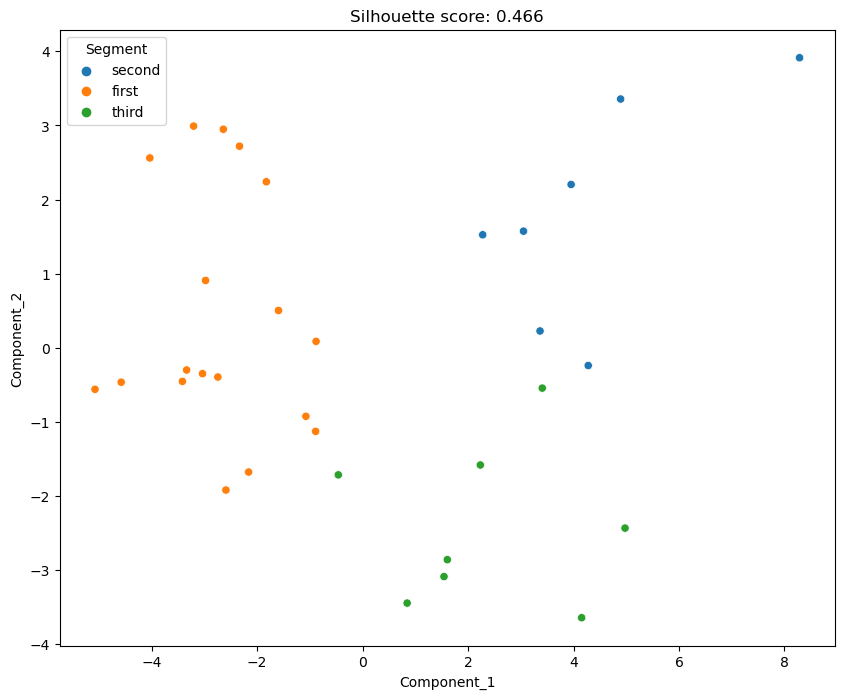

In [37]:
x_axis = center_clusters['Component_1']
y_axis = center_clusters['Component_2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=center_clusters['Segment'])
plt.title("Silhouette score: {}".format(round(silhouette_score(pca_data, kmeans_pca.labels_), 3)))

plt.show()

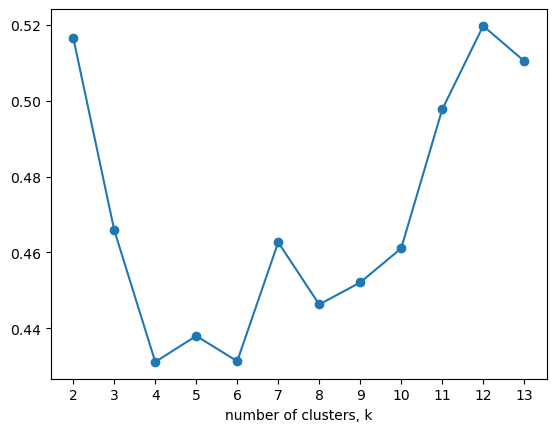

In [38]:
ks = range(2,14)
sh = []

for k in ks:
    model = KMeans(n_clusters = k, init='k-means++', random_state=42)
    model.fit_predict(pca_data)
    sh.append(silhouette_score(pca_data, model.labels_))
    
plt.plot(ks, sh, '-o')
plt.xlabel('number of clusters, k')
plt.xticks(ks)
plt.show()

In [39]:
#EDA

center_clusters[center_clusters['Segment'] == 'first'].describe()

,PLAYER_ID,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,FG3M_G,FG3A_G,...,PF_G,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G,Component_1,Component_2,Segment K-means PCA
count,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,1.153922e+06,210.537778,112.037315,38.631704,14.267713,2.633128,4.863854,0.532232,0.207523,0.676340,...,2.018464,6.610796,0.809001,4.780160,1.656020,3.124140,16.382348,-2.689634,0.376160,0.0
std,6.918267e+05,3.885344,7.045943,14.726443,11.058496,0.744289,1.244970,0.061887,0.246689,0.752806,...,0.459108,1.694343,0.237451,0.959531,0.381201,0.884762,3.071094,1.187207,1.625433,0.0
min,2.015770e+05,203.200000,97.522360,18.000000,0.500000,1.747218,2.682956,0.434600,0.000000,0.003295,...,0.886296,4.456736,0.373704,2.899767,0.953478,1.312500,10.863333,-5.075463,-1.921487,0.0
25%,2.035870e+05,208.280000,108.862169,24.200000,5.250000,2.128076,4.282516,0.488050,0.019513,0.147664,...,1.837883,5.365528,0.628781,4.324582,1.422869,2.642661,13.492622,-3.304582,-0.537875,0.0
50%,1.628395e+06,210.820000,111.130131,39.254167,12.812500,2.525934,4.739498,0.521813,0.074053,0.313474,...,1.973987,6.434309,0.826000,4.995403,1.589764,3.454609,17.242693,-2.693598,-0.325890,0.0
75%,1.630197e+06,213.360000,115.099064,49.303571,20.708791,2.695729,5.563434,0.577833,0.414566,1.212040,...,2.305909,7.235164,0.886719,5.244672,1.943300,3.726140,18.895440,-1.910154,1.906832,0.0
max,1.630846e+06,218.440000,127.459456,62.733333,40.200000,4.698718,7.967949,0.636500,0.755342,2.427626,...,2.812500,11.368590,1.334073,6.750595,2.265625,4.553539,20.846814,-0.882500,2.991405,0.0


In [40]:
center_clusters[center_clusters['Segment'] == 'second'].describe()

,PLAYER_ID,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,FG3M_G,FG3A_G,...,PF_G,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G,Component_1,Component_2,Segment K-means PCA
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,8.144506e+05,211.545714,116.573239,51.770120,44.845565,6.403768,12.018359,0.533863,0.573417,1.757296,...,2.694470,16.079522,2.567970,8.709551,2.464042,6.245509,29.040729,4.301144,1.793776,1.0
std,7.629401e+05,2.416022,10.854672,11.426353,18.650907,1.111364,2.220151,0.038359,0.372479,1.030705,...,0.340095,2.451489,1.877789,2.001446,0.592483,1.654156,3.773498,1.953298,1.518159,0.0
min,2.015720e+05,208.280000,97.522360,36.500000,6.500000,4.729167,8.812500,0.483857,0.101522,0.353177,...,2.190217,12.638889,1.327219,5.824240,1.411232,3.886576,22.340278,2.277533,-0.240909,1.0
25%,2.026905e+05,210.820000,111.810519,42.750000,41.550000,5.732138,10.489675,0.506517,0.273414,0.907077,...,2.478708,14.567560,1.581978,7.117301,2.226431,4.932518,27.513147,3.208098,0.874894,1.0
50%,2.039990e+05,210.820000,117.934016,57.538462,53.615385,6.170211,12.624695,0.541500,0.534722,1.979167,...,2.819444,16.190668,1.807672,9.519485,2.547413,6.667547,30.841890,3.954576,1.573124,1.0
75%,1.629803e+06,212.090000,124.057513,58.176190,54.664286,7.402903,13.260345,0.555024,0.906708,2.650335,...,2.840960,17.234734,2.509596,10.418798,2.905136,7.647941,30.905167,4.586357,2.779988,1.0
max,1.630596e+06,215.900000,128.820233,66.500000,61.375000,7.656918,15.191281,0.588600,1.017429,2.853905,...,3.212293,20.122511,6.657751,10.550935,3.026516,8.003522,33.266304,8.286989,3.914453,1.0


In [41]:
center_clusters[center_clusters['Segment'] == 'third'].describe()

,PLAYER_ID,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,FG3M_G,FG3A_G,...,PF_G,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G,Component_1,Component_2,Segment K-means PCA
count,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,5.594751e+05,211.455000,119.124696,55.859704,43.623603,4.376307,7.443613,0.594329,0.022088,0.119732,...,2.500953,10.795515,1.495020,9.563474,3.194698,6.368776,25.910382,2.288175,-2.415913,2.0
std,6.595506e+05,3.527375,7.253174,7.216255,10.907618,0.776459,1.880955,0.059170,0.030827,0.153207,...,0.423713,2.031152,0.467655,1.805568,0.469311,1.562622,2.647381,1.797922,1.062958,0.0
min,2.015990e+05,205.740000,110.222946,43.727273,24.142857,3.358739,5.019633,0.485182,0.000000,0.004446,...,1.985312,8.278132,0.899981,6.672257,2.599387,3.817967,21.223224,-0.460901,-3.645479,2.0
25%,2.033935e+05,210.185000,114.872268,52.333333,39.173295,3.636212,6.117466,0.568322,0.000481,0.007721,...,2.257745,8.692636,1.191279,8.620148,2.826250,5.780950,24.473143,1.368881,-3.179580,2.0
50%,2.037455e+05,210.820000,118.614405,55.414861,45.351393,4.604367,7.229944,0.610865,0.002715,0.027928,...,2.355170,11.638424,1.519397,9.465777,3.236816,6.493101,26.290760,1.919814,-2.648674,2.0
75%,5.599332e+05,213.995000,121.789551,60.507143,47.600000,4.759872,8.379091,0.626150,0.044260,0.228993,...,2.667164,12.132462,1.629382,10.372196,3.355328,7.095060,27.507897,3.594048,-1.683674,2.0
max,1.628386e+06,215.900000,131.541787,66.800000,60.300000,5.607649,10.499166,0.672632,0.080350,0.394872,...,3.172502,13.407171,2.405480,12.354788,4.041958,8.312830,29.558643,4.977026,-0.545716,2.0


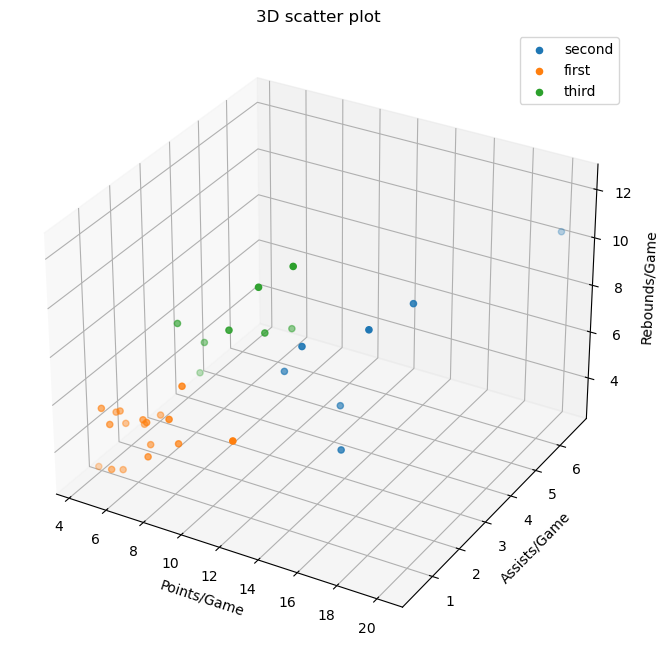

In [42]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")
for s in center_clusters.Segment.unique():
    ax.scatter(center_clusters.PTS_G[center_clusters.Segment==s],center_clusters.AST_G[center_clusters.Segment==s],
               center_clusters.REB_G[center_clusters.Segment==s],label=s)
ax.legend()
plt.title("3D scatter plot")
plt.xlabel('Points/Game')
plt.ylabel('Assists/Game')
ax.set_zlabel('Rebounds/Game')
plt.show()

In [43]:
jokic = center_clusters[center_clusters['NAME'] == 'Nikola Jokic']
jokic[['NAME', 'PTS_G', 'AST_G', 'REB_G']]

,NAME,PTS_G,AST_G,REB_G
15,Nikola Jokic,20.122511,6.657751,10.437264
